# Métodos para cálculo de aerofólios #

Serão apresentados os métodos clássicos e modernos de projeto de aerofólios.

## Arefólios NACA 4 Dígitos ##

o Aerofólio é desenhado a partir de uma curva central de arqueamento e a espessura máxima do perfil, que são definidos por 3 números:

NACA  | M | P | TT
Sendo:
* M = É o arqueamento máximo do perfil (em porcentagem da corda ( M/100 = %))
* P = É a posição do ponto máximo de arqueamento (em porcentagem da corda (P/10 = %))
* TT = é a espessura máxima do perfil no ponto P (em porcentagem da corda (TT/100 = %))

Então, o perfil NACA 2412 possui 2% de arqueamento, com ponto máximo em 40% do perfil e 12% de espessura máxima.

Para traçar o perfil, primeiro deve-se traçar a curva de arqueamento, que é dividida na parcela anterior e posterior ao ponto P, considerando corda unitária:

Para $0\leq x<P$: 
 
$y_c(x) = \frac{M}{P^2}(2Px-x^2) $

$\frac{dy_c}{x}=\frac{2M}{P^2}(P-x)$

Para $P\leq x >1$:

$y_c(x) = \frac{M}{(1-P)^2}(1-2P+2Px-x^2)$

$\frac{dy_c}{x}=\frac{2M}{(1-P)^2}(P-x)$


Já a distribuição de espessura ao longo da corda é dada pela expressão:

$y_t(x) = \frac{TT}{0.2}(a_0x^{0.5}+a_1x+a_2x^2+a3x^3+a_4x^4)$

Sendo:

$a_0 = 0.2969 \quad\quad a_1 = -0.126 \quad\quad a_2 = -0.3516 \quad\quad a_3 = 0.2843 \quad\quad a_4 = -0.1036$

Por fim, o Cálculo das superfícies superior e inferior do aerofólio são definidas:

* Superfície Superior: $X_u = x-y_t(x)\sin{\theta} \quad\quad\quad Y_u = y_c(x)+y_t(x)\cos{\theta}$
* Superfície Inferior: $X_b = x-y_t(x)\sin{\theta} \quad\quad\quad Y_b = y_c(x)-y_t(x)\cos{\theta}$

Sendo $\theta = atan\left(\frac{dy_c}{x}\right)$


In [1]:
import math
import numpy as np
from ipywidgets import interact
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def NACA4(P,TT,M):
    Npoints = 50
    a0 = 0.2969
    a1 = -0.126
    a2 = -0.3516
    a3 = 0.2843
    a4 = -0.1036 #Se quiser manter o perfil aberto no bordo de fuga, usar -0.1015
    YU = []
    YB = []
    X  = []
    YC = []
    
    b = np.linspace(0,math.pi,Npoints)
    x = (1-np.cos(b))/2
    TT = TT/100
    M  = M/100
    P  = P/10
    for xc in x:
    
        if xc<P:
            yc = (M/math.pow(P,2))*(2*P*xc-math.pow(xc,2))
            dyc =(2*M/math.pow(P,2))*(P-xc)
        else:
            yc = (M/(math.pow(1-P,2)))*(1-2*P+2*P*xc-math.pow(xc,2))
            dyc =(2*M/(math.pow(1-P,2)))*(P-xc)
    
        theta = np.arctan(dyc)
    
        yt = (TT/0.2)*(a0*math.sqrt(xc) + a1*xc + a2*math.pow(xc,2) + a3*math.pow(xc,3) + a4*math.pow(xc,4))
        
        X.append(xc-yt*np.sin(theta))
        YU.append(yc+yt*np.cos(theta))
        YB.append(yc-yt*np.cos(theta))
        YC.append(yc)
        
    X  = np.array(X)    
    YU = np.array(YU)
    YC = np.array(YC)
    YB = np.array(YB)
    
    fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(X, YC,color="black")
    ax.plot(X, YU,color="blue")
    ax.plot(X,YB,color="red")
    ax.grid(True)
    ax.title.set_text('Perfil NACA %d%d%0.2d'%(int(M*100),int(P*10),int(TT*100)))
    ax.set_xlabel('Corda relativa')
    ax.set_ylabel('Espessura relativa')
    ax.set_aspect('equal', 'datalim')
    ax.legend(['Arqueamento','Extradorso','Intradorso'], loc=0)
    fig.canvas.draw()
    
interact(NACA4, P=widgets.IntSlider(min=0,max=9,step=1,value=0),TT=widgets.IntSlider(min=1,max=30,step=1,value=10),M=widgets.IntSlider(min=0,max=9,step=1,value=0));

interactive(children=(IntSlider(value=0, description='P', max=9), IntSlider(value=10, description='TT', max=30…

## Aerofólios Horten

Os perfis aerodinâmicos desenvolvidos pelos irmãos Horten para asas voadoras possuem 2 grandezas de controle:

* M - O arqueamento máximo do perfil;
* TT - A espessura máxima do perfil.

A linha de arqueamento é definida pela expressão:

$y_c(x) = M\frac{x}{0,1055}(1-x)^3$

Já a distribuição de espessura é calculada pela expressão:

$y_t(x) = TT\sqrt{x}\sqrt{2-x}(1-x)$

O Extradorso é definido então pela soma de $y_c(x)$ com $y_t(x)$ e o intradorso pela subtração:

$Y_u(x) = y_c(x)+y_t(x)$

$Y_b(x) = y_c(x)-y_t(x)$

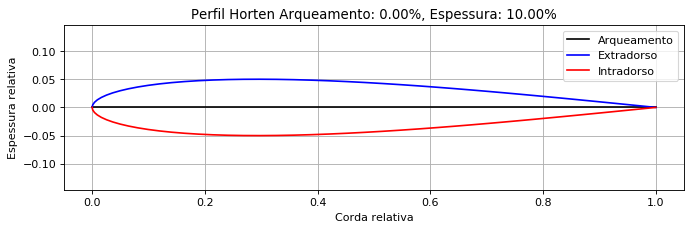

In [3]:
def HORTEN(TT,M):
    Npoints = 50
    c1 = 0.1055
    YU = []
    YB = []
    X  = []
    YC = []
    
    b = np.linspace(0,math.pi,Npoints)
    x = (1-np.cos(b))/2
    TT = TT/100
    M  = M/100
    x = (1-np.cos(b))/2

    for xc in x:
    
        yc = M*(xc/c1)*math.pow((1-xc),3)
        yt = TT*math.sqrt(xc)*math.sqrt(2-xc)*(1-xc)
        
        X.append(xc)
        YU.append(yc+yt)
        YB.append(yc-yt)
        YC.append(yc)
        
    X  = np.array(X)    
    YU = np.array(YU)
    YC = np.array(YC)
    YB = np.array(YB)
    
    fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(X, YC,color="black")
    ax.plot(X, YU,color="blue")
    ax.plot(X,YB,color="red")
    ax.set_aspect('equal', 'datalim')
    ax.grid(True)
    ax.title.set_text('Perfil Horten Arqueamento: %2.2f%%, Espessura: %2.2f%%'%(M*100,TT*100))
    ax.set_xlabel('Corda relativa')
    ax.set_ylabel('Espessura relativa')
    ax.set_aspect('equal', 'datalim')
    ax.legend(['Arqueamento','Extradorso','Intradorso'], loc=0)
    fig.canvas.draw()
interact(HORTEN,TT=widgets.FloatSlider(min=1,max=30,step=0.01,value=10),M=widgets.FloatSlider(min=0,max=30,step=0.01,value=0));

# Desafio! #

- Existem vários outros métodos geométricos para traçar perfis (tais como os perfis Selig, Worthman..), você é capaz de aplicá-los aqui?
- O que acha de adicionar uma opção para exportar o perfil em um arquivo .dat?